<a href="https://colab.research.google.com/github/faisal9873/Data-Cleaning/blob/main/DataQuality_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import wget

In [ ]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

##Loading the Dataset
#####The dataset is based on California's [Vehicle Fuel Type Count by Zip Code report](https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/1856386b-a196-4e7c-be81-44174e29ad50). 

In [ ]:
#creating directory to store the dataset
if not os.path.isdir("../data/transport"):
  os.makedirs("../data/transport")

In [ ]:
#download the new .csv dataa
remote_url = 'https://data.ca.gov/dataset/15179472-adeb-4df6-920a-20640d02b08c/resource/1856386b-a196-4e7c-be81-44174e29ad50/download/vehicle-fuel-type-count-by-zip-code-2022.csv'
data = pd.read_csv('https://data.ca.gov/dataset/15179472-adeb-4df6-920a-20640d02b08c/resource/1856386b-a196-4e7c-be81-44174e29ad50/download/vehicle-fuel-type-count-by-zip-code-2022.csv')

wget.download(remote_url, '../data/transport')

<ipython-input-89-2a95be261ac7>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://data.ca.gov/dataset/15179472-adeb-4df6-920a-20640d02b08c/resource/1856386b-a196-4e7c-be81-44174e29ad50/download/vehicle-fuel-type-count-by-zip-code-2022.csv')


'../data/transport/vehicle-fuel-type-count-by-zip-code-2022 (1).csv'

In [ ]:
!ls -l ../data/transport

total 70752
-rw-r--r-- 1 root root 36222226 May 21 07:24 'vehicle-fuel-type-count-by-zip-code-2022 (1).csv'
-rw-r--r-- 1 root root 36222226 May 21 02:20  vehicle-fuel-type-count-by-zip-code-2022.csv


#Read Dataset into a Pandas Dataframe
#####We read the dataset downloaded and create a Pandas Dataframe. We also add a Pandas .head() function to display the top 5 rows of data in the Dataframe. Head() and Tail() are best practice functions used to investigate datasets

In [ ]:
df_transport = pd.read_csv('../data/transport/vehicle-fuel-type-count-by-zip-code-2022.csv')

<ipython-input-91-85133b887359>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transport = pd.read_csv('../data/transport/vehicle-fuel-type-count-by-zip-code-2022.csv')


In [ ]:
df_transport.head()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,1/1/2022,90000,2020,Gasoline,OTHER/UNK,Light,1
1,1/1/2022,90000,2022,Gasoline,OTHER/UNK,Light,1
2,1/1/2022,90000,<2008,Gasoline,OTHER/UNK,Heavy,22
3,1/1/2022,90000,<2008,Gasoline,OTHER/UNK,Light,20
4,1/1/2022,90000,<2008,Gasoline,OTHER/UNK,Unk,12


#DataFrame Column Data Types
#####Dataframes may have heterogenous or mixed data types, that is, some columns are numbers some are strings, and some are dates, etc. and CSV files do not contain information on what data types are contained in each column, Pandas infers the data type when loading the data, e.g. if a column contains only numbers, Pandas will set the column's data type to numeric: integer or float

In [ ]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722465 entries, 0 to 722464
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Date        722465 non-null  object
 1   Zip Code    722465 non-null  object
 2   Model Year  722465 non-null  object
 3   Fuel        722465 non-null  object
 4   Make        722465 non-null  object
 5   Duty        722465 non-null  object
 6   Vehicles    722465 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 38.6+ MB


In [ ]:
print(df_transport, 5)

            Date Zip Code Model Year              Fuel       Make   Duty  \
0       1/1/2022    90000       2020          Gasoline  OTHER/UNK  Light   
1       1/1/2022    90000       2022          Gasoline  OTHER/UNK  Light   
2       1/1/2022    90000      <2008          Gasoline  OTHER/UNK  Heavy   
3       1/1/2022    90000      <2008          Gasoline  OTHER/UNK  Light   
4       1/1/2022    90000      <2008          Gasoline  OTHER/UNK    Unk   
...          ...      ...        ...               ...        ...    ...   
722460  1/1/2022      OOS      <2008         Flex-Fuel   CHRYSLER  Light   
722461  1/1/2022      OOS      <2008         Flex-Fuel   CHRYSLER    Unk   
722462  1/1/2022      OOS      <2008         Flex-Fuel      MAZDA  Light   
722463  1/1/2022      OOS      <2008         Flex-Fuel    MERCURY  Light   
722464  1/1/2022      OOS      <2008  Battery Electric  OTHER/UNK  Light   

        Vehicles  
0              1  
1              1  
2             22  
3          

#Summary Statistics

#####For features that contain only numeric values such as Vehnicles, we are often interested in various statistical measures.

In [ ]:
df_transport.describe()

,Vehicles
count,722465.000000
mean,42.968505
std,133.045923
min,1.000000
25%,9.000000
50%,18.000000
75%,40.000000
max,18814.000000


#####We now investigate a bit more of the data using the .groupby() function

In [ ]:
#The .groupby function is used for splitting the data into groups based on some criteria
grouped_data = df_transport.groupby(['Zip Code', 'Model Year', 'Fuel', 'Make', 'Duty', 'Vehicles'])

#Get the first entry for each month
df_transport.groupby('Fuel').first()

,Date,Zip Code,Model Year,Make,Duty,Vehicles
Fuel,,,,,,
Battery Electric,1/1/2022,90001,2011,OTHER/UNK,Light,1
Diesel and Diesel Hybrid,1/1/2022,90000,<2008,OTHER/UNK,Heavy,17
Flex-Fuel,1/1/2022,90001,2008,OTHER/UNK,Light,8
Gasoline,1/1/2022,90000,2020,OTHER/UNK,Light,1
Hybrid Gasoline,1/1/2022,90001,2008,OTHER/UNK,Light,14
Hydrogen Fuel Cell,1/1/2022,90001,2017,OTHER/UNK,Light,2
Natural Gas,1/1/2022,90001,2008,OTHER/UNK,Light,1
Other,1/1/2022,90000,<2008,OTHER/UNK,Light,6
Plug-in Hybrid,1/1/2022,90001,2012,OTHER/UNK,Light,2


#Checking for Missing Values

#####Missing values affect the quality of our data, resulting to incorrect visualizations or inaccurate trained machine learning models resulting to making inaccurate inferences. Missing values can be due to human error, information lost during data packets streaming transmission. Pandas recognizes both empty cells and "NaN" types as missing values. 

######We can show the null values for all features in the DataFrame

In [ ]:
df_transport.isnull().sum()

Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Duty          0
Vehicles      0
dtype: int64

#####We can display the sample of which values are missing for each feature

In [ ]:
print(df_transport['Date'])
print(df_transport['Date'].isnull())

0         1/1/2022
1         1/1/2022
2         1/1/2022
3         1/1/2022
4         1/1/2022
            ...   
722460    1/1/2022
722461    1/1/2022
722462    1/1/2022
722463    1/1/2022
722464    1/1/2022
Name: Date, Length: 722465, dtype: object
0         False
1         False
2         False
3         False
4         False
          ...  
722460    False
722461    False
722462    False
722463    False
722464    False
Name: Date, Length: 722465, dtype: bool


In [ ]:
print(df_transport['Make'])
print(df_transport['Make'].isnull())

0         OTHER/UNK
1         OTHER/UNK
2         OTHER/UNK
3         OTHER/UNK
4         OTHER/UNK
            ...    
722460     CHRYSLER
722461     CHRYSLER
722462        MAZDA
722463      MERCURY
722464    OTHER/UNK
Name: Make, Length: 722465, dtype: object
0         False
1         False
2         False
3         False
4         False
          ...  
722460    False
722461    False
722462    False
722463    False
722464    False
Name: Make, Length: 722465, dtype: bool


In [ ]:
print(df_transport['Model Year'])
print(df_transport['Model Year'].isnull())

0          2020
1          2022
2         <2008
3         <2008
4         <2008
          ...  
722460    <2008
722461    <2008
722462    <2008
722463    <2008
722464    <2008
Name: Model Year, Length: 722465, dtype: object
0         False
1         False
2         False
3         False
4         False
          ...  
722460    False
722461    False
722462    False
722463    False
722464    False
Name: Model Year, Length: 722465, dtype: bool


#We can summarize our data by row, column, features, unique, and missing values

In [ ]:
print("Rows    : ", df_transport.shape[0])
print("Columns    : ", df_transport.shape[1])
print("\nFeatures :\n", df_transport.columns.tolist())
print("\nUnique values  :\n", df_transport.nunique())
print("\nMissing values  : ", df_transport.isnull().sum().values.sum())

Rows    :  722465
Columns    :  7

Features :
 ['Date', 'Zip Code', 'Model Year', 'Fuel', 'Make', 'Duty', 'Vehicles']

Unique values  :
 Date             1
Zip Code      5049
Model Year      17
Fuel             9
Make           113
Duty             3
Vehicles      2219
dtype: int64

Missing values  :  0


#####Let's see our data again

In [ ]:
#Output the last five rows in the dataset
df_transport.tail()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
722460,1/1/2022,OOS,<2008,Flex-Fuel,CHRYSLER,Light,24
722461,1/1/2022,OOS,<2008,Flex-Fuel,CHRYSLER,Unk,26
722462,1/1/2022,OOS,<2008,Flex-Fuel,MAZDA,Light,14
722463,1/1/2022,OOS,<2008,Flex-Fuel,MERCURY,Light,20
722464,1/1/2022,OOS,<2008,Battery Electric,OTHER/UNK,Light,2


#####We can check again for missing values by showing how many rows contain NaN values for each feature column

In [ ]:
df_transport.isnull().sum()

Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Duty          0
Vehicles      0
dtype: int64

In [ ]:
#We can use the apply function to apply the lambda 
df_transport = df_transport.apply(lambda x:x.fillna(x.value_counts().index[0]))

#####We can check again for missing values

In [ ]:
df_transport.isnull().sum()

Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Duty          0
Vehicles      0
dtype: int64

#####Convert the Date feature column to a Datetime format

In [ ]:
df_transport['Date'] = pd.to_datetime(df_transport['Date'], format='%m/%d/%Y')

In [ ]:
#Date should be converted now and will display the summary of the dataframe

df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722465 entries, 0 to 722464
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        722465 non-null  datetime64[ns]
 1   Zip Code    722465 non-null  object        
 2   Model Year  722465 non-null  object        
 3   Fuel        722465 non-null  object        
 4   Make        722465 non-null  object        
 5   Duty        722465 non-null  object        
 6   Vehicles    722465 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 38.6+ MB


In [ ]:
#We can now parse the date into three columns, that is, year, month, day
df_transport['year'] = df_transport['Date'].dt.year
df_transport['month'] = df_transport['Date'].dt.month
df_transport['day'] = df_transport['Date'].dt.day

df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722465 entries, 0 to 722464
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        722465 non-null  datetime64[ns]
 1   Zip Code    722465 non-null  object        
 2   Model Year  722465 non-null  object        
 3   Fuel        722465 non-null  object        
 4   Make        722465 non-null  object        
 5   Duty        722465 non-null  object        
 6   Vehicles    722465 non-null  int64         
 7   year        722465 non-null  int64         
 8   month       722465 non-null  int64         
 9   day         722465 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 55.1+ MB


In [ ]:
grouped_data = df_transport.groupby(['Make'])


df_transport.groupby('month').first()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles,year,day
month,,,,,,,,,
1,2022-01-01,90000,2020,Gasoline,OTHER/UNK,Light,1,2022,1


Text(0.5, 1.0, 'Vehicles by Month')

<Figure size 1000x600 with 0 Axes>

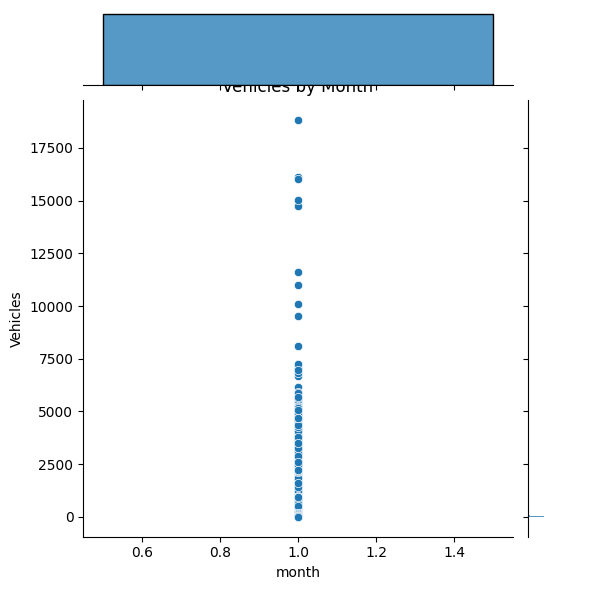

In [ ]:
plt.figure(figsize=(10,6))

#We can study the relationship between two variables
sns.jointplot(x='month', y='Vehicles', data = df_transport)

plt.title('Vehicles by Month')

#####We can rename feature columns by converting upper and lower cases to all lower cases as well as remove values such as '<2008'

In [ ]:
df_transport.rename(columns= {'Date': 'date', 'Zip Code': 'zipcode', 'Model Year': 'modelyear', 'Fuel': 'fuel', 'Make':'make', 'Duty': 'lightduty', 'Vehicles': 'vehicles'}, inplace = True)

In [ ]:
df_transport.head(2)

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2022-01-01,90000,2020,Gasoline,OTHER/UNK,Light,1,2022,1,1
1,2022-01-01,90000,2022,Gasoline,OTHER/UNK,Light,1,2022,1,1


In [ ]:
#We create a copy of the dataframe with only integer dates with no symbols
df = df_transport.loc[(df_transport.modelyear != '<2008') & (df_transport.modelyear != '<2006')&(df_transport.lightduty != 'Unk')].copy()

In [ ]:
#We confirm whether the modelyear value '<2006' has been removed by doing a value count
df['modelyear'].value_counts(0)

2017    45564
2019    43982
2016    43877
2015    43467
2018    42657
2014    40807
2021    39782
2020    39713
2013    39586
2012    37088
2011    32507
2008    31160
2010    27771
2009    24521
2022    15260
2023        4
Name: modelyear, dtype: int64

#####We can convert features with categorical variables to one-hot encoding

In [ ]:
df['lightduty'].value_counts(0)

Light    479865
Heavy     67881
Name: lightduty, dtype: int64

In [ ]:
df.loc[:,'lightduty'] = df['lightduty'].apply(lambda x: 0 if (x=='Heavy'or x=='No') else 1)
df['lightduty'].value_counts(0)

<ipython-input-119-6100dfb629f7>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'lightduty'] = df['lightduty'].apply(lambda x: 0 if (x=='Heavy'or x=='No') else 1)


1    479865
0     67881
Name: lightduty, dtype: int64

In [ ]:
#confirm that lightduty has been converted 
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2022-01-01,90000,2020,Gasoline,OTHER/UNK,1,1,2022,1,1
1,2022-01-01,90000,2022,Gasoline,OTHER/UNK,1,1,2022,1,1
13,2022-01-01,90001,2008,Gasoline,OTHER/UNK,0,10,2022,1,1
14,2022-01-01,90001,2008,Gasoline,OTHER/UNK,1,86,2022,1,1
16,2022-01-01,90001,2008,Gasoline,FORD,1,74,2022,1,1


#####Converting categorical variables to indicator or dummy variables is the only way they can be useful in training machine learning models

In [ ]:
data_dummy = pd.get_dummies(df[['zipcode', 'modelyear', 'fuel', 'make']], drop_first=True)

data_dummy.head()

,zipcode_90001,zipcode_90002,zipcode_90003,zipcode_90004,zipcode_90005,zipcode_90006,zipcode_90007,zipcode_90008,zipcode_90009,zipcode_90010,...,make_SUZUKI,make_TESLA,make_THOMAS BUILT BUSES,make_TOYOTA,make_VAN HOOL,make_VOLKSWAGEN,make_VOLVO,make_VPG,make_WESTERN STAR,make_WORKHORSE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Merging original data with dummy dataframe
df = pd.concat([df, data_dummy], axis=1)
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day,...,make_SUZUKI,make_TESLA,make_THOMAS BUILT BUSES,make_TOYOTA,make_VAN HOOL,make_VOLKSWAGEN,make_VOLVO,make_VPG,make_WESTERN STAR,make_WORKHORSE
0,2022-01-01,90000,2020,Gasoline,OTHER/UNK,1,1,2022,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2022-01-01,90000,2022,Gasoline,OTHER/UNK,1,1,2022,1,1,...,0,0,0,0,0,0,0,0,0,0
13,2022-01-01,90001,2008,Gasoline,OTHER/UNK,0,10,2022,1,1,...,0,0,0,0,0,0,0,0,0,0
14,2022-01-01,90001,2008,Gasoline,OTHER/UNK,1,86,2022,1,1,...,0,0,0,0,0,0,0,0,0,0
16,2022-01-01,90001,2008,Gasoline,FORD,1,74,2022,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#drop the atrributes for which dummy variables were made
df = df.drop(['date', 'zipcode', 'modelyear', 'fuel', 'make'], axis=1)

In [ ]:
df.head()

,lightduty,vehicles,year,month,day,zipcode_90001,zipcode_90002,zipcode_90003,zipcode_90004,zipcode_90005,...,make_SUZUKI,make_TESLA,make_THOMAS BUILT BUSES,make_TOYOTA,make_VAN HOOL,make_VOLKSWAGEN,make_VOLVO,make_VPG,make_WESTERN STAR,make_WORKHORSE
0,1,1,2022,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2022,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,10,2022,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,86,2022,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,1,74,2022,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
